# Voting methods

This notebook compares a number of common voting methods.

For now, we will assume that all voters exist on a 2D political axis (it's common to treat voters as lying along economic and social axes) ranging from 0 to 5. Voters will prefer candidates that are closest in the space, with the order of preference determined by distance from the voter.

In [1]:
from collections import namedtuple
from math import sqrt
Person = namedtuple('Person', 'x y')

def distance(voter, candidate):
    return sqrt((voter.x - candidate.x)**2 + (voter.y - candidate.y)**2)

voter1 = Person(0.5, 1.5)
candidate1 = Person(1.0, 2.0)
candidate2 = Person(4.0, 4.0)

assert distance(voter1, candidate1) < distance(voter1, candidate2)

For these initial examples, we will use an electoral base of 100 voters. Voters will exist in the 8-bloc breakdown of registered voters described by [Pew's Political Typology project](http://www.people-press.org/2017/10/24/political-typology-reveals-deep-fissures-on-the-right-and-left/). Within each category there will be some variation. Later, we may experiment with different distributions of voters.

For candidates, we will use four parties: a center-left party (the Donkeys), a center-right party (the Elephants), a far-left party (the Leaves), and a far-right party (the Hedgehogs). All resemblences to real-life political parties are purely coincidental.

In [2]:
import numpy as np
from statistics import mean

def generate_bloc(n, x, y):
    return [Person(t[0], t[1]) for t in zip(np.random.normal(x, 0.1, n), np.random.normal(y, 0.1, n))]

def generate_population():
    blocs = [
        (15, 4.5, 4.5),
        (7, 4.0, 4.0),
        (12, 3.5, 3.5),
        (11, 3.0, 3.0),
        (9, 2.0, 2.0),
        (14, 1.5, 1.5),
        (13, 1.0, 1.0),
        (19, 0.5, 0.5)
    ]
    
    return [voter for bloc in blocs for voter in generate_bloc(*bloc)]

voters = generate_population()
len(voters), mean(v.x for v in voters), mean(v.y for v in voters)

(100, 2.303570287903615, 2.3131011229557004)

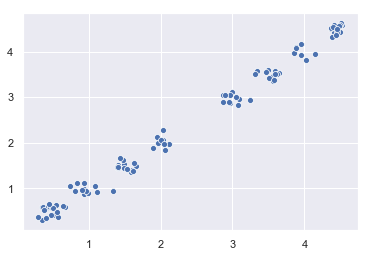

In [3]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

sns.scatterplot(x=[v.x for v in voters], y=[v.y for v in voters])